In [6]:
import pymongo
import json

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['MOOC']
user_collection = db['user']
forum_collection = db['forum']
    
    # Exemple d'utilisation avec la collection "user"
    # print(user_collection.find_one())
    # for doc in user_collection.find().limit(10):
    #     print(doc)

# Etape 3 : Compter le nombre de documents dans chaque collection
print(f"Nombre de documents dans la collection 'user' : {user_collection.count_documents({})}")
print(f"Nombre de documents dans la collection 'forum' : {forum_collection.count_documents({})}")

# Etape 4 : Compter le nombre de messages par utilisateur
pipeline = [
        {"$unwind": "$content"},
        {"$group": {"_id": "$content.username", "body": {"$sum": 1}}},
        {"$sort": {"body": -1}},
        {"$limit": 5}
]

result = list(forum_collection.aggregate(pipeline))
for user in result:
    print(f"{user['_id']} a posté {user['body']} messages")

Nombre de documents dans la collection 'user' : 112390
Nombre de documents dans la collection 'forum' : 73646
None a posté 4758 messages
pigret a posté 132 messages
nabla09 a posté 131 messages
jphzapata a posté 98 messages
mhuten a posté 96 messages


4758 messages inconnu ou qui n'existe pas dans la base de données. Cela peut être dû à des messages postés par des utilisateurs anonymes ou des erreurs dans les données.

In [18]:
import pymongo
import json

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['MOOC']
user_collection = db['user']
forum_collection = db['forum']

# Etape 4 : Compter le nombre de messages par utilisateur
pipeline = [
        {"$unwind": "$content"},
        {"$group": {"_id": "$content.username", "count": {"$sum": 1}}}
]

result = list(forum_collection.aggregate(pipeline))
print(f"{len(result)} utilisateurs ont posté des messages")

36243 utilisateurs ont posté des messages


In [20]:
import pymongo
import json

client = pymongo.MongoClient("mongodb://localhost:27017/")
db = client['MOOC']
user_collection = db['user']
forum_collection = db['forum']

# Premier utilisateur à avoir posté
first_user = forum_collection.find_one({"content": {"$exists": True}}, sort=[("content.created_at", 1)])["content"]["username"]
print("Premier utilisateur à avoir posté : ", first_user)

# Dernier utilisateur à avoir posté
last_user = forum_collection.find_one({"content": {"$exists": True}}, sort=[("content.created_at", -1)])["content"]["username"]
print("Dernier utilisateur à avoir posté : ", last_user)


Premier utilisateur à avoir posté :  qb
Dernier utilisateur à avoir posté :  Huane


In [4]:
pipeline = [
        {"$group": {
            "_id": {
                "$dateToString": {"format": "%Y-%m", "date": {"$toDate": "$content.created_at"}}
            },
            "count": {"$sum": 1}
        }}
    ]

result = list(forum_collection.aggregate(pipeline))
for r in result:
    print(f"{r['_id']} : {r['count']} messages")

2016-07 : 2372 messages
2016-09 : 1842 messages
2016-12 : 1007 messages
2016-01 : 133 messages
2020-03 : 115 messages
2020-07 : 67 messages
2016-04 : 1348 messages
2020-01 : 375 messages
2020-10 : 112 messages
2016-03 : 164 messages
2019-05 : 131 messages
2020-02 : 150 messages
2021-01 : 482 messages
2017-11 : 3439 messages
2021-05 : 205 messages
2018-03 : 1606 messages
2018-09 : 421 messages
2019-06 : 134 messages
2020-06 : 225 messages
2015-02 : 265 messages
2015-03 : 159 messages
2018-02 : 972 messages
2021-04 : 186 messages
2018-08 : 16 messages
2016-08 : 2254 messages
2018-12 : 444 messages
2019-04 : 276 messages
2017-01 : 1781 messages
2017-06 : 1661 messages
2018-06 : 1804 messages
2019-07 : 38 messages
2017-07 : 642 messages
2014-12 : 36 messages
2016-02 : 96 messages
2017-12 : 1564 messages
2014-08 : 2 messages
2015-10 : 6 messages
2018-07 : 663 messages
2015-11 : 114 messages
2019-11 : 675 messages
2020-08 : 15 messages
2021-02 : 278 messages
2016-05 : 1819 messages
2015-01 :

In [5]:
pipeline = [
        {"$group": {
            "_id": {"$dayOfWeek": {"$toDate": "$content.created_at"}},
            "count": {"$sum": 1}
        }}
    ]

result = list(forum_collection.aggregate(pipeline))
for r in result:
    print(f"Jour {r['_id']} : {r['count']} messages")

Jour 4 : 11854 messages
Jour 5 : 11505 messages
Jour 3 : 13488 messages
Jour 2 : 13228 messages
Jour 6 : 9396 messages
Jour 7 : 6752 messages
Jour 1 : 7423 messages


In [6]:
pipeline = [
        {"$group": {
            "_id": {"$hour": {"$toDate": "$content.created_at"}},
            "count": {"$sum": 1}
        }}
    ]

result = list(forum_collection.aggregate(pipeline))
for r in result:
    print(f"Heure {r['_id']} : {r['count']} messages")

Heure 1 : 1096 messages
Heure 19 : 3597 messages
Heure 0 : 1289 messages
Heure 3 : 952 messages
Heure 18 : 3887 messages
Heure 20 : 3690 messages
Heure 15 : 4999 messages
Heure 7 : 2369 messages
Heure 16 : 4743 messages
Heure 17 : 4436 messages
Heure 22 : 2468 messages
Heure 23 : 1735 messages
Heure 8 : 3439 messages
Heure 21 : 3391 messages
Heure 5 : 1063 messages
Heure 6 : 1569 messages
Heure 2 : 995 messages
Heure 10 : 4454 messages
Heure 13 : 4812 messages
Heure 9 : 4365 messages
Heure 4 : 923 messages
Heure 12 : 4178 messages
Heure 14 : 5078 messages
Heure 11 : 4118 messages


In [7]:
import pandas as pd
import plotly.express as px
pipeline = [
        {"$unwind": "$content"},
        {"$group": {"_id": {"$substr": ["$content.created_at", 0, 7]}, "count": {"$sum": 1}}}
    ]
result = list(forum_collection.aggregate(pipeline))
df = pd.DataFrame(result)

    # Convertir les dates en type 'datetime'
df['_id'] = pd.to_datetime(df['_id'])

    # Tracer un histogramme avec Plotly Express
fig = px.histogram(df, x='_id', y='count', nbins=len(df['_id']))
fig.show()

In [64]:
import pandas as pd
import plotly.express as px

pipeline = [
        {"$unwind": "$content"},
        {"$group": {"_id": {"$substr": ["$content.created_at", 0, 7]}, "count": {"$sum": 1}}}
    ]
result = list(forum_collection.aggregate(pipeline))
result_sorted = sorted(result, key=lambda r: r['_id'])
df = pd.DataFrame(result_sorted)

# Convertir les dates en type 'datetime'
df['_id'] = pd.to_datetime(df['_id'])

# Tracer une courbe avec Plotly Express
fig = px.line(df, x='_id', y='count')
fig.show()


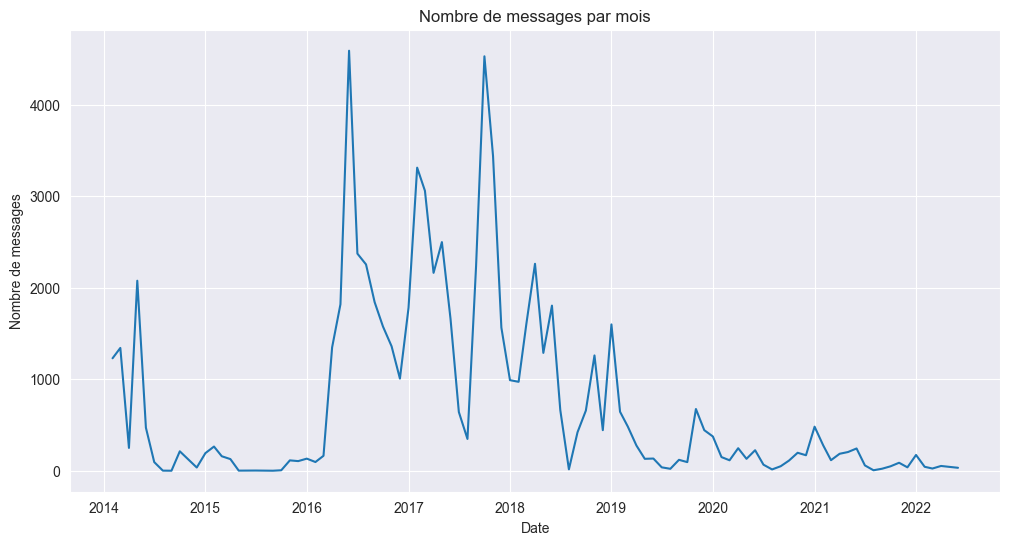

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pipeline = [
        {"$unwind": "$content"},
        {"$group": {"_id": {"$substr": ["$content.created_at", 0, 7]}, "count": {"$sum": 1}}}
    ]
result = list(forum_collection.aggregate(pipeline))
df = pd.DataFrame(result)

# Convertir les dates en type 'datetime'
df['_id'] = pd.to_datetime(df['_id'])

# Tracer une courbe avec Seaborn et Matplotlib
plt.figure(figsize=(12, 6))
sns.lineplot(x='_id', y='count', data=df)
plt.xlabel('Date')
plt.ylabel('Nombre de messages')
plt.title('Nombre de messages par mois')
plt.show()


In [24]:
import pandas as pd
import plotly.express as px
from datetime import datetime

pipeline = [
    {"$unwind": "$content"},
    {"$group": {
        "_id": {"$isoDayOfWeek": {"$toDate": "$content.created_at"}},
        "count": {"$sum": 1}
    }}
]

result = list(forum_collection.aggregate(pipeline))

# Convertir les nombres de jour en noms et les dates en objets datetime
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result = [{"dayOfWeek": days[x['_id']-1], "count": x['count'], "date": datetime(2022, 1, x['_id'])} for x in result]

df = pd.DataFrame(result)

fig = px.histogram(df, x='dayOfWeek', y='count', nbins=len(df['dayOfWeek']))
fig.show()

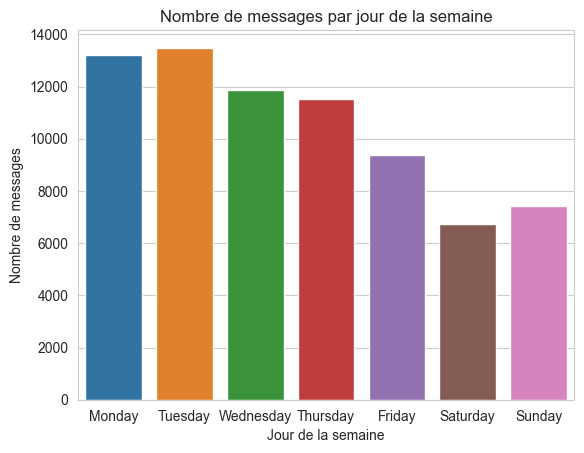

In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

pipeline = [
{"$unwind": "$content"},
{"$group": {
"_id": {"$isoDayOfWeek": {"$toDate": "$content.created_at"}},
"count": {"$sum": 1}
}}
]

result = list(forum_collection.aggregate(pipeline))

days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
result = [{"dayOfWeek": days[x['_id']-1], "count": x['count'], "date": datetime(2022, 1, x['_id'])} for x in result]

df = pd.DataFrame(result)

sns.set_style("whitegrid")
sns.barplot(x="dayOfWeek", y="count", data=df, order=days)
plt.title("Nombre de messages par jour de la semaine")
plt.xlabel("Jour de la semaine")
plt.ylabel("Nombre de messages")
plt.show()

In [26]:
import pandas as pd
import plotly.express as px

pipeline = [
    {"$group": {
        "_id": {"$hour": {"$toDate": "$content.created_at"}},
        "count": {"$sum": 1}
    }}
]

result = list(forum_collection.aggregate(pipeline))

# Afficher le nombre de messages par heure
for r in result:
    print(f"Heure {r['_id']} : {r['count']} messages")

df = pd.DataFrame(result)
fig = px.histogram(df, x='_id', y='count', nbins=len(df['_id']), range_x=[0,23])
fig.update_layout(
    xaxis_title="Heure de la journée",
    yaxis_title="Nombre de messages",
    title="Nombre de messages par heure de la journée"
)
fig.show()

Heure 15 : 4999 messages
Heure 9 : 4365 messages
Heure 13 : 4812 messages
Heure 22 : 2468 messages
Heure 23 : 1735 messages
Heure 10 : 4454 messages
Heure 4 : 923 messages
Heure 11 : 4118 messages
Heure 14 : 5078 messages
Heure 12 : 4178 messages
Heure 20 : 3690 messages
Heure 18 : 3887 messages
Heure 6 : 1569 messages
Heure 3 : 952 messages
Heure 0 : 1289 messages
Heure 2 : 995 messages
Heure 19 : 3597 messages
Heure 1 : 1096 messages
Heure 8 : 3439 messages
Heure 21 : 3391 messages
Heure 5 : 1063 messages
Heure 7 : 2369 messages
Heure 17 : 4436 messages
Heure 16 : 4743 messages


In [27]:
import pandas as pd
import plotly.express as px

pipeline = [
        {"$group": {
            "_id": {"$hour": {"$toDate": "$content.created_at"}},
            "count": {"$sum": 1}
        }},
        {"$sort": {"count": -1}},
        {"$limit": 5}
    ]

result = list(forum_collection.aggregate(pipeline))
for r in result:
    print(f"Heure {r['_id']} : {r['count']} messages")
df = pd.DataFrame(result)
fig = px.histogram(df, x='_id', y='count', nbins=len(df['_id']))
fig.show()

Heure 14 : 5078 messages
Heure 15 : 4999 messages
Heure 13 : 4812 messages
Heure 16 : 4743 messages
Heure 10 : 4454 messages


In [35]:
import pandas as pd
import plotly.express as px

pipeline = [
    {"$group": {
        "_id": {"$hour": {"$toDate": "$content.created_at"}},
        "count": {"$sum": 1}
    }}
]

result = list(forum_collection.aggregate(pipeline))

# Afficher le nombre de messages par heure
# for r in result:
#     print(f"Heure {r['_id']} : {r['count']} messages")

result_sorted = sorted(result, key=lambda r: r['_id'])

df = pd.DataFrame(result_sorted)
fig = px.line(df, x='_id', y='count')
fig.update_layout(
    xaxis_title="Heure de la journée",
    yaxis_title="Nombre de messages",
    title="Nombre de messages par heure de la journée"
)
fig.show()

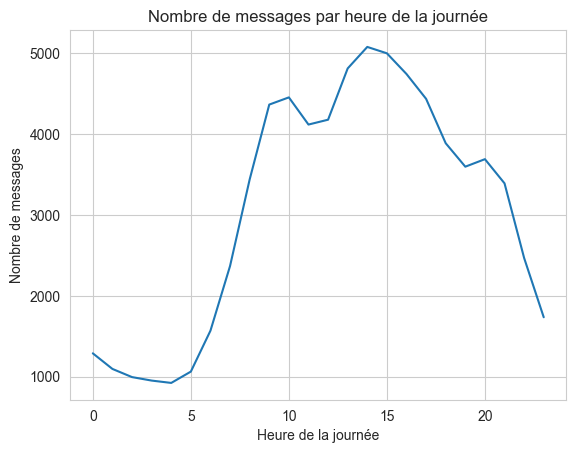

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pipeline = [
    {"$group": {
        "_id": {"$hour": {"$toDate": "$content.created_at"}},
        "count": {"$sum": 1}
    }}
]

result = list(forum_collection.aggregate(pipeline))

# Afficher le nombre de messages par heure
# for r in result:
#     print(f"Heure {r['_id']} : {r['count']} messages")

result_sorted = sorted(result, key=lambda r: r['_id'])

df = pd.DataFrame(result_sorted)

sns.set_style("whitegrid")
sns.lineplot(data=df, x="_id", y="count")
plt.xlabel("Heure de la journée")
plt.ylabel("Nombre de messages")
plt.title("Nombre de messages par heure de la journée")
plt.show()
